# Abdul Wahid Awan 20i-2367 J Lab4

# Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.ensemble import RandomForestClassifier

# PreProcessing

In [4]:
parent=r'C:\Users\Abdul Wahid Awan\Downloads'
os.chdir(parent)

In [5]:
df = pd.read_csv('Housing.csv')
df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,3123904,390488,734,532,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1519896,379974,498,763,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1152112,288028,382,754,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,887292,221823,503,441,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,483084,241542,497,486,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,364276,182138,374,487,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,734160,367080,570,644,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
columns = ['guestroom','basement','hotwaterheating','airconditioning','prefarea','mainroad']
df = df.drop(columns,axis=1)

In [7]:
le = LabelEncoder()
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])
df

,price,area,length,width,bedrooms,bathrooms,stories,parking,furnishingstatus
0,1465896,244316,593,412,4,2,3,2,0
1,3123904,390488,734,532,4,4,4,3,0
2,1519896,379974,498,763,3,2,2,2,1
3,1152112,288028,382,754,4,2,2,3,0
4,887292,221823,503,441,4,1,2,2,0
...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,2,2
541,483084,241542,497,486,3,1,1,0,1
542,364276,182138,374,487,2,1,1,0,2
543,734160,367080,570,644,3,1,1,0,0


# Univariate Analysis

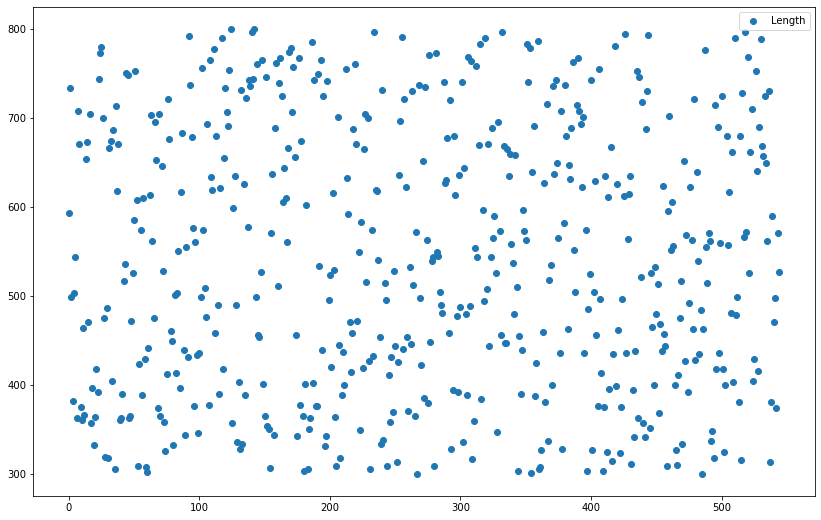

In [8]:
plt.figure(figsize=(14,9))
value=df['length'].values
plt.scatter(range(len(df['length'])),value,label='Length')
plt.legend(loc=1)

In [9]:
attributes = df['length'].describe()
print('Mean= ',attributes['mean'])
print('Standard Deviation= ', attributes['std'])
Variance = np.var(value)
print('Variance= ',Variance)

Mean=  539.1357798165137
Standard Deviation=  148.35440446467734
Variance=  21968.645784024913


In [10]:
ZScores = np.array(df['length'].values - np.mean(df['length'])) / np.std(df['length'])
ZScores

array([ 3.63411556e-01,  1.31471150e+00, -2.77535212e-01, -1.06016495e+00,
       -2.43801171e-01,  3.28179601e-02, -1.19510111e+00,  1.13929449e+00,
        8.82915779e-01, -1.10739261e+00, -1.20859473e+00, -5.06926687e-01,
       -1.16811388e+00,  7.74966850e-01,  9.03156203e-01, -4.66445838e-01,
        1.11230725e+00, -1.22883515e+00, -9.65709637e-01, -1.39750535e+00,
       -1.18160750e+00, -8.24026667e-01, -9.92696869e-01,  1.38217958e+00,
        1.57783701e+00,  1.61831786e+00,  1.08532002e+00, -4.32711798e-01,
       -1.48521386e+00, -3.58496909e-01, -1.49870748e+00,  8.55928547e-01,
        9.09903011e-01, -9.11735172e-01,  9.90864708e-01, -1.57966917e+00,
        1.17302853e+00,  5.32081758e-01,  8.82915779e-01, -1.20859473e+00,
       -1.18835430e+00, -1.00619049e+00, -1.49345858e-01, -2.11565046e-02,
        1.42266043e+00,  1.40916681e+00, -1.18835430e+00, -1.17486069e+00,
       -4.52952222e-01, -9.53713936e-02,  3.09437092e-01,  1.43615404e+00,
        4.64613678e-01, -

In [11]:
Uni_df=pd.DataFrame()
Uni_df['Length']=value
Uni_df['Zscore']=ZScores

In [12]:
Uni_df

,Length,Zscore
0,593,0.363412
1,734,1.314711
2,498,-0.277535
3,382,-1.060165
4,503,-0.243801
...,...,...
540,470,-0.466446
541,497,-0.284282
542,374,-1.114139
543,570,0.208235


# Model Training without Normalization

In [13]:
labels=df['furnishingstatus']
df=df.drop(columns=['furnishingstatus'],axis=1)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(df,labels,test_size=0.3,train_size=0.7,shuffle=True)

In [14]:
def forest_classifier(Xtrain,Ytrain,Xtest,Ytest):
    forest= RandomForestClassifier()
    forest.fit(Xtrain,Ytrain)
    prediction = forest.predict(Xtest)
    print('F1 Score= ',f1_score(Ytest,prediction,average='macro')*100)

In [15]:
forest_classifier(Xtrain,Ytrain,Xtest,Ytest)

F1 Score=  29.539666248527013


# Model Training with Normalization

# Unit Normalization

In [27]:
df1= df
columns=df1.columns[:-1]
for col in columns:
    val=df1[col]
    mini=np.min(df1[col])
    maxi=np.max(df1[col])
    rangee=maxi-mini
    value_norm= (val-mini)/rangee
    df1[col] = value_norm
df1

,price,area,length,width,bedrooms,bathrooms,stories,parking
0,0.287069,0.288093,0.586,0.224,0.6,0.333333,0.666667,2
1,0.663195,0.569795,0.868,0.464,0.6,1.000000,1.000000,3
2,0.299319,0.549533,0.396,0.926,0.4,0.333333,0.333333,2
3,0.215885,0.372335,0.164,0.908,0.6,0.333333,0.333333,3
4,0.155810,0.244745,0.406,0.282,0.6,0.000000,0.333333,2
...,...,...,...,...,...,...,...,...
540,0.040247,0.181372,0.340,0.204,0.2,0.000000,0.000000,2
541,0.064113,0.282747,0.394,0.372,0.4,0.000000,0.000000,0
542,0.037161,0.168264,0.148,0.374,0.2,0.000000,0.000000,0
543,0.121071,0.524684,0.540,0.688,0.4,0.000000,0.000000,0


In [30]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(df1,labels,test_size=0.3,train_size=0.7,shuffle=True)

In [31]:
forest_classifier(Xtrain,Ytrain,Xtest,Ytest)

F1 Score=  31.300097089570773


# Range Normalization

In [32]:
def RangeNormalize(val,lower,upper):
    return lower+(upper-lower)*val

In [34]:
df2 = df
columns=df2.columns[:-1]

for col in columns:
    value=df2[col]
    df2[col] = 0.2+(0.9-0.2)*value
df2

,price,area,length,width,bedrooms,bathrooms,stories,parking
0,0.465758,0.466332,0.63316,0.43044,0.641,0.491667,0.678333,2
1,0.676389,0.624085,0.79108,0.56484,0.641,0.865000,0.865000,3
2,0.472619,0.612738,0.52676,0.82356,0.529,0.491667,0.491667,2
3,0.425896,0.513507,0.39684,0.81348,0.641,0.491667,0.491667,3
4,0.392253,0.442057,0.53236,0.46292,0.641,0.305000,0.491667,2
...,...,...,...,...,...,...,...,...
540,0.327538,0.406569,0.49540,0.41924,0.417,0.305000,0.305000,2
541,0.340903,0.463338,0.52564,0.51332,0.529,0.305000,0.305000,0
542,0.325810,0.399228,0.38788,0.51444,0.417,0.305000,0.305000,0
543,0.372800,0.598823,0.60740,0.69028,0.529,0.305000,0.305000,0


In [38]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(df2,labels,test_size=0.3,train_size=0.7,shuffle=True)

In [39]:
forest_classifier(Xtrain,Ytrain,Xtest,Ytest)

F1 Score=  34.85150712873485


# Plotting Area wrt Independent Variables

# 2-D Graphs

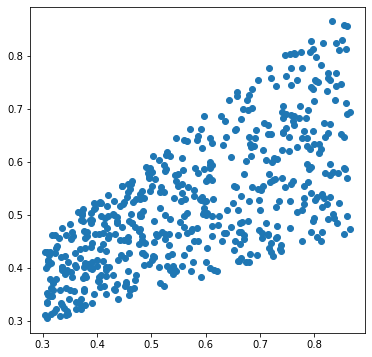

In [45]:
fig = plt.figure(figsize=(6,6))
plt.scatter(df['length'],df['area'])

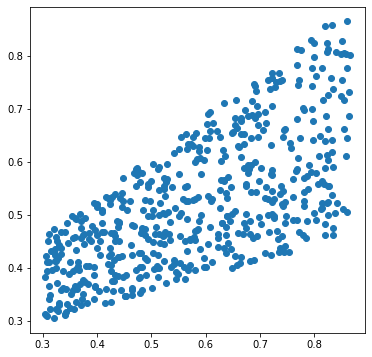

In [46]:
fig = plt.figure(figsize=(6,6))
plt.scatter(df['width'],df['area'])

# 3-D Graphs

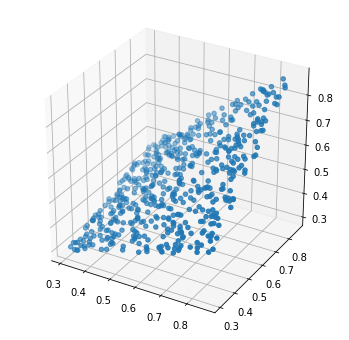

In [53]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['length'],df['width'],df['area']) 
plt.show()

# Co-variance Matrix

In [57]:
CovMatrix = np.dot(np.transpose(df2),df2)
cov_df= pd.DataFrame(CovMatrix,index=df.columns)
cov_df.columns = df.columns
cov_df

,price,area,length,width,bedrooms,bathrooms,stories,parking
price,97.336048,120.560133,132.596732,133.715193,119.768108,82.074959,108.280570,154.311905
area,120.560133,154.968171,169.741579,171.120964,148.747906,101.675078,128.827423,189.084932
length,132.596732,169.741579,193.853259,180.483831,164.466564,112.243549,142.287049,214.100880
width,133.715193,171.120964,180.483831,197.034190,165.720905,113.390304,143.806570,208.749520
bedrooms,119.768108,148.747906,164.466564,165.720905,153.987489,104.151932,133.288918,203.882000
bathrooms,82.074959,101.675078,112.243549,113.390304,104.151932,74.803514,91.647381,143.290000
stories,108.280570,128.827423,142.287049,143.806570,133.288918,91.647381,127.272403,175.583333
parking,154.311905,189.084932,214.100880,208.749520,203.882000,143.290000,175.583333,666.000000


In [58]:
diagonal = np.diagonal(CovMatrix)
Variance = diagonal/len(df2)
print('Variance= ',Variance)

Variance=  [0.17859825 0.28434527 0.35569405 0.36153062 0.28254585 0.13725415
 0.23352734 1.22201835]


# Co-relation of Length && Area

In [60]:
cor_df = pd.DataFrame(np.corrcoef(df2,rowvar=False),index=df.columns)
cor_df.columns = df.columns
cor_df

,price,area,length,width,bedrooms,bathrooms,stories,parking
price,1.000000,0.607827,0.435523,0.407210,0.335762,0.276222,0.740398,-0.055252
area,0.607827,1.000000,0.695952,0.677425,0.033856,0.042773,-0.000482,-0.124971
length,0.435523,0.695952,1.000000,-0.021047,0.071629,0.040536,0.008633,-0.031198
width,0.407210,0.677425,-0.021047,1.000000,-0.000656,0.032149,0.006299,-0.133752
bedrooms,0.335762,0.033856,0.071629,-0.000656,1.000000,0.373930,0.408564,0.139270
bathrooms,0.276222,0.042773,0.040536,0.032149,0.373930,1.000000,0.326165,0.177496
stories,0.740398,-0.000482,0.008633,0.006299,0.408564,0.326165,1.000000,0.045547
parking,-0.055252,-0.124971,-0.031198,-0.133752,0.139270,0.177496,0.045547,1.000000


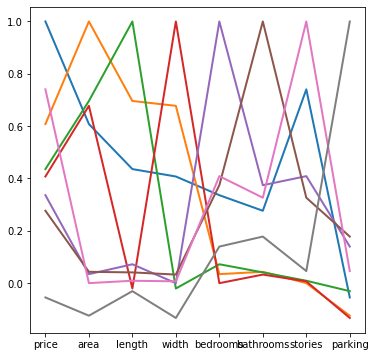

In [68]:
fig = plt.figure(figsize=(6,6))
plt.plot(cor_df,linewidth=2)

# Three-friends Problem

In [78]:
cities=['A','B','C','D','E']
cities_comb=[]
for i in cities:
    for j in cities:
        for y in cities:
            cities_comb.append(i+j+y)
            
same_cities = []
count = 0
for i in cities_comb:
    if (i[0] == i[-1]) or (i[0] == i[1]) or (i[1] == i[-1]):
        count += 1
        same_cities.append(i)

probability = count/len(cities_comb)
print("Probability that 2 person go to the same city = ",probability)

Probability that 2 person go to the same city =  0.52


# Density Function

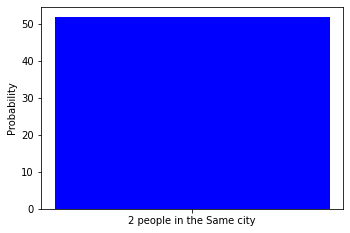

In [86]:
fig = plt.figure()
probability = [52]
axis = fig.add_axes([0.2, 0.2, 0.7, 0.7])
axis.set_ylabel('Probability')
axis.bar(['2 people in the Same city'], probability, color='blue')
plt.show()

# Analysis

In [87]:
# This was a discrete distribution and univariate problem